# Exercise 1 -  Named entity recognition with Harry Potter

In [1]:
import nltk
import re

With the code below i load the text and clean the chapters.

In [2]:
with open("harry-potter.txt", "r") as f:
    raw_text = f.read()
    # raw_text = raw_text.replace('\n', " ")

raw_chapters = raw_text.split("CHAPTER")
chapters = []

for i, chapter in enumerate(raw_chapters):
    if i == 0:
        chapters.append((chapter, "N/A"))
        continue
    text_start = re.search("[a-z]", chapter).start() - 1
    chapter_name = chapter[:text_start]
    chapters.append((chapter_name.replace("\n\n", ", ").strip(), chapter[text_start:]
                                                        .replace("\'", "'")
                                                        .replace("\n\n\n", "\n\n")
                                                        .replace("\n\n", "\n")
                                                        .replace("\n", " ").strip()))


In [3]:
text = chapters[1][1]

## Part 1

I tokenize and tag the sentences with `nltk` standard tokenization and tagging. I choose the first five sentences for illustration purposes.

In [187]:
def tag_sents(text, length = 0):
    if length == 0:
        subset = nltk.sent_tokenize(text, language="english")
    else:
        subset = nltk.sent_tokenize(text, language="english")[:length]
    subset = [nltk.word_tokenize(word) for word in subset]
    tagged_subset = nltk.pos_tag_sents(subset,lang='eng')
    return tagged_subset

I try to fetch some entities using noun phrases.

In [185]:
np_parser = nltk.RegexpParser(r'''
NP: {<DT>?<JJ.*>*<NN.*>+}
CLAUSE: {<VB.*>+<IN|NP>+}
''')

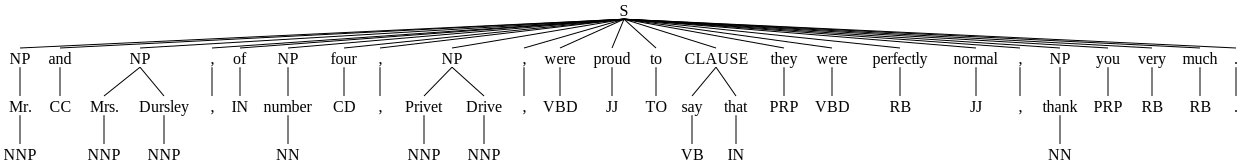

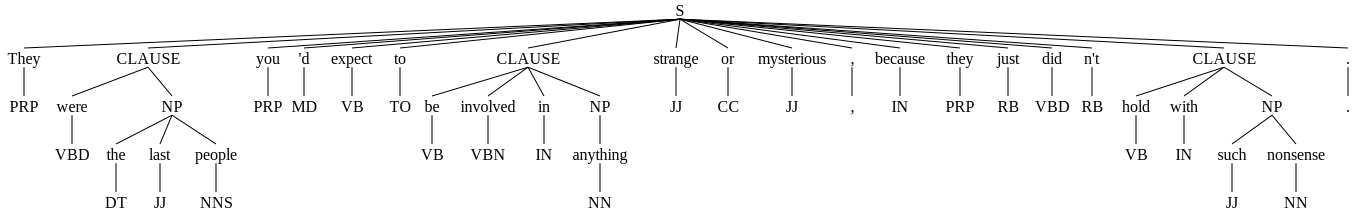

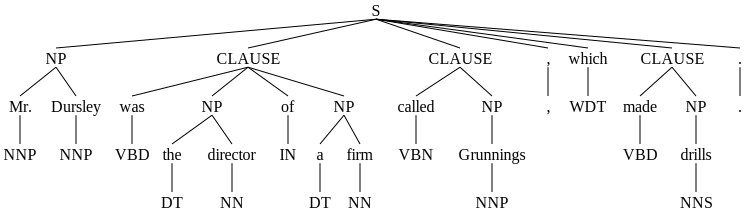

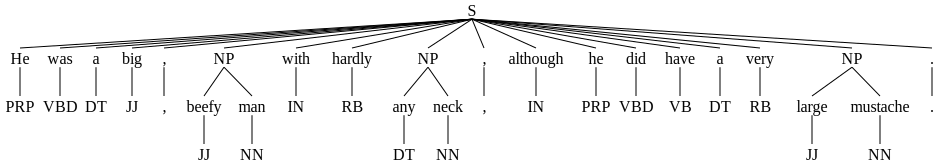

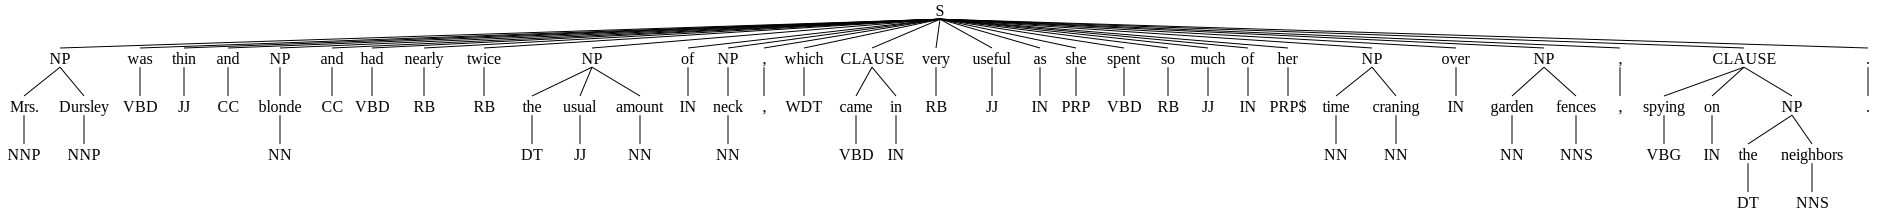

In [188]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

for i, sent in enumerate(tag_sents(text, 5)):
    np_parser.parse(sent)

# InteractiveShell.ast_node_interactivity = "last"

We can see that noun phrases to some degree can identify named entities, but not all the time.

## Part 2

I will now chunk pronouns in the same five sentences.

In [98]:
np_parser = nltk.RegexpParser(r'''
NP: {<DT>?<JJ.*>*<NN.*>+}
PRN: {<PR.*|WP.*>}
CLAUSE: {<VB.*>+<IN|NP>+}
''')

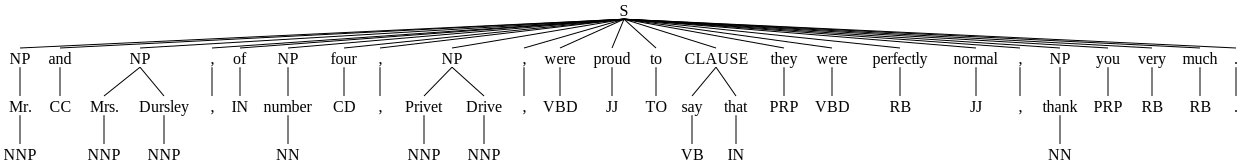

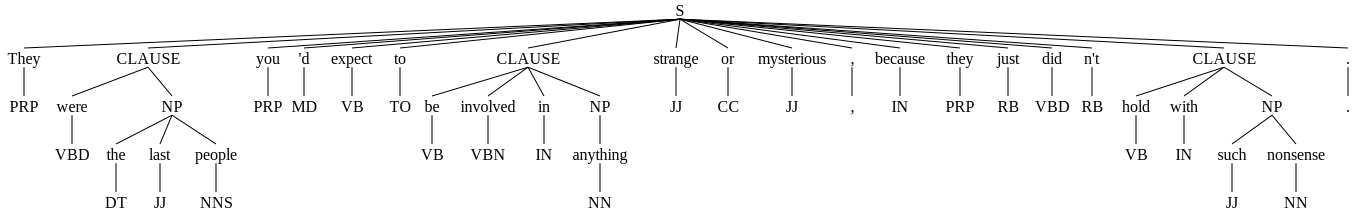

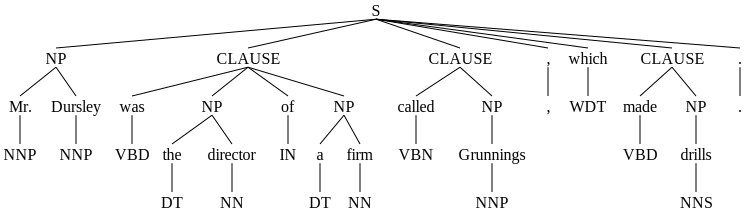

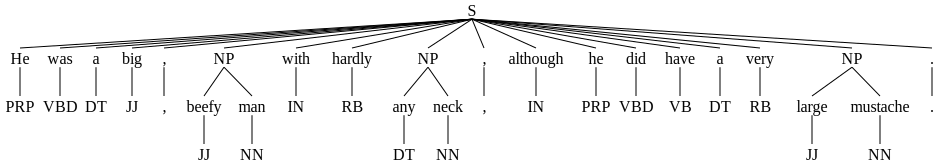

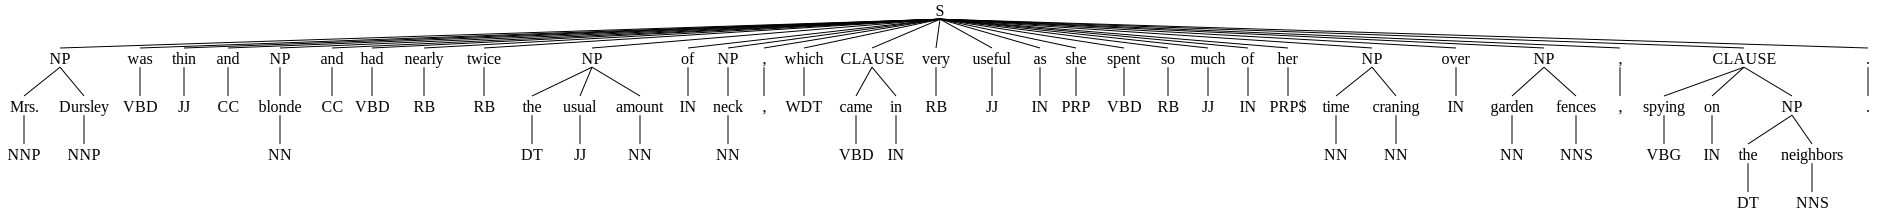

In [189]:
for i, sent in enumerate(tag_sents(text, 5)):
    np_parser.parse(sent)

The entity must be named in full before we can know what pronoun it should have. I.e in sentence 1, we have a PRN 'they' after the first CLAUSE. We know from context that 'they' here refer to mr. and mrs. Dursley. I would perhaps link the first NP with the first PRN to attribute pronoun to the entities of this text.

## Part 3

We now get to use `nltk` built-in NER functionality.

In [190]:
chapter_2 = chapters[2][1]

In [191]:
tagged_subset = tag_sents(chapter_2)
ne_chunks = nltk.ne_chunk_sents(tagged_subset, binary=True)
ne_chunk_list = list(ne_chunks)

In [194]:
entities = []

for tree in ne_chunk_list:
    # print(tree)
    for subtree in tree.subtrees():
        if subtree.label() == "NE":
            entities.append(" ".join([word for word, POS in list(subtree)]))

In [195]:
nltk.FreqDist(entities).most_common(10)

[('Harry', 75),
 ('Dudley', 53),
 ('Aunt Petunia', 20),
 ('Uncle Vernon', 17),
 ('Dursleys', 11),
 ('Piers', 8),
 ('Brazil', 3),
 ('Harry Potter', 2),
 ('Vernon', 2),
 ('Privet Drive', 1)]

Here we can see the most common named entities i chapter 2.

## Part 4

We now get to implement `spaCy` on the previous tasks.

In [196]:
import spacy
nlp = spacy.load("en_core_web_lg")
doc = nlp(text)

In [205]:
from spacy import displacy
render_ent = "ent"
render_dep = "dep"
displacy.render(list(doc.sents)[:5], style=render_ent)

C:\Users\mathi\.conda\envs\nltk\lib\site-packages\spacy\displacy\__init__.py:200: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
